<a href="https://colab.research.google.com/github/Arnisyahh/T3-Social-Media-Analysis/blob/main/Kpop_Analysis_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Analisis Tweet Kpop - Sentiment Analysis

from google.colab import files
import pandas as pd

uploaded = files.upload()

# Baca CSV ke DataFrame
df = pd.read_csv("kpop_tweets.csv")
print("Jumlah data:", len(df))
df.head()

import re
from bs4 import BeautifulSoup

# Daftar singkatan umum (bisa ditambah sesuai kebutuhan)
abbreviations = {
    "u": "you",
    "r": "are",
    "btw": "by the way",
    "idk": "i don't know",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "thx": "thanks",
    "pls": "please",
    "smh": "shaking my head",
    "tbh": "to be honest",
    "brb": "be right back"
}

def clean_text(text):
    text = str(text)
    text = BeautifulSoup(text, "html.parser").get_text()   # hapus HTML
    text = re.sub(r"http\S+|www\S+", "", text)             # hapus URL
    text = re.sub(r"@\w+", "", text)                       # hapus mention
    text = re.sub(r"#", " #", text)                        # biar hashtag jadi token
    text = text.lower().strip()

    # Ganti singkatan dengan bentuk panjang
    tokens = text.split()
    tokens = [abbreviations[t] if t in abbreviations else t for t in tokens]

    # Satukan lagi, tanda baca tidak dihapus
    text = " ".join(tokens)
    return text

# Tambahkan kolom cleaned di DataFrame
df["cleaned"] = df["text"].apply(clean_text)
df[["text","cleaned"]].head(10)

# Analisis kata & hashtag

all_text = " ".join(df["cleaned"].astype(str))
words = re.findall(r"\b\w+\b", all_text)

stopwords = ["https","rt","kpop","co","amp"]
words = [w for w in words if w not in stopwords and len(w) > 2]

word_freq = Counter(words).most_common(20)
print("20 kata paling sering:", word_freq)

hashtags = re.findall(r"#\w+", all_text)
hashtag_freq = Counter(hashtags).most_common(15)
print("Top 15 hashtags:", hashtag_freq)

# Wordcloud

!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(words))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud Tweet Kpop")
plt.show()

# Sentiment Analysis (TextBlob)

!pip install textblob
from textblob import TextBlob

df["sentiment"] = df["cleaned"].apply(lambda x: TextBlob(x).sentiment.polarity)

def label_sentiment(x):
    if x > 0.1:
        return "positif"
    elif x < -0.1:
        return "negatif"
    else:
        return "netral"

df["sentiment_label"] = df["sentiment"].apply(label_sentiment)

print("\nDistribusi sentimen:")
print(df["sentiment_label"].value_counts())

# Visualisasi Sentimen

counts = df["sentiment_label"].value_counts()
plt.figure(figsize=(6,6))
counts.plot.pie(autopct="%1.1f%%", ylabel="", title="Distribusi Sentimen (TextBlob)")
plt.show()

# Contoh Tweet tiap kategori

for label in ["positif","netral","negatif"]:
    print(f"\n=== Contoh {label.upper()} ===")
    sample = df[df["sentiment_label"]==label].head(3)[["text"]]
    print(sample.to_string(index=False))

# Kesimpulan sederhana

mayoritas = df["sentiment_label"].value_counts().idxmax()
print(f"\nKESIMPULAN: Mayoritas opini publik terhadap topik 'Kpop' cenderung {mayoritas}.")

# === Simpan hasil ke CSV baru ===
output_file = "kpop_tweets_sentiment.csv"
df.to_csv(output_file, index=False, encoding="utf-8")
print(f"Hasil sudah disimpan ke {output_file}")



TypeError: 'NoneType' object is not subscriptable

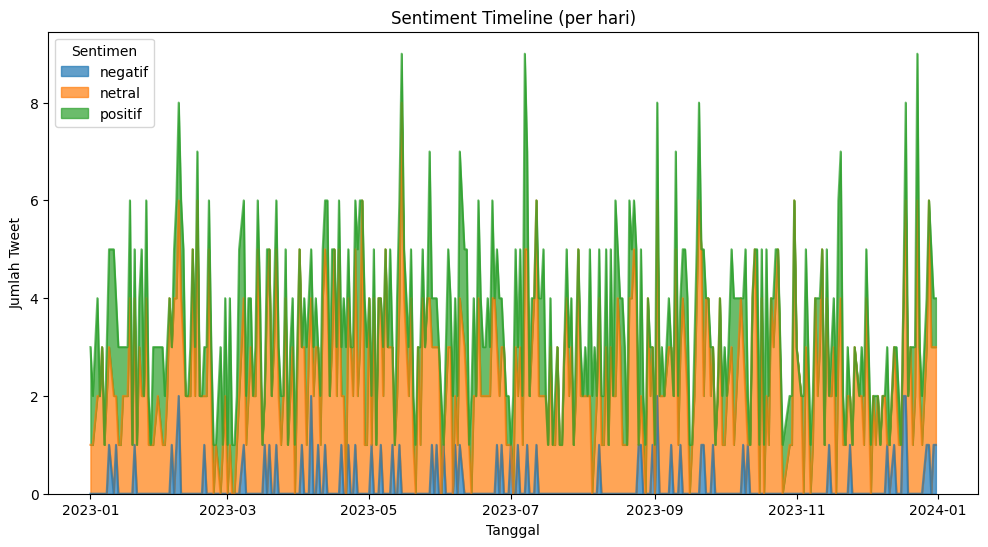

In [ ]:
import matplotlib.pyplot as plt

# pastikan kolom 'date' sudah datetime
df['date'] = pd.to_datetime(df['date'])

# hitung jumlah sentimen per hari
timeline = df.groupby([df['date'].dt.date, 'sentiment_label']).size().unstack().fillna(0)

# plot stacked area
timeline.plot(kind='area', stacked=True, figsize=(12,6), alpha=0.7)
plt.title("Sentiment Timeline (per hari)")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Tweet")
plt.legend(title="Sentimen")
plt.show()


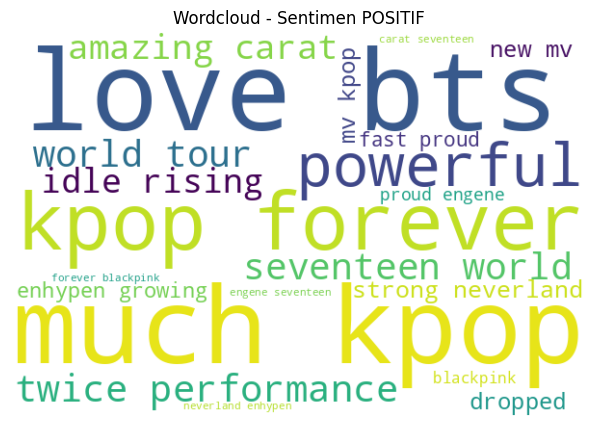

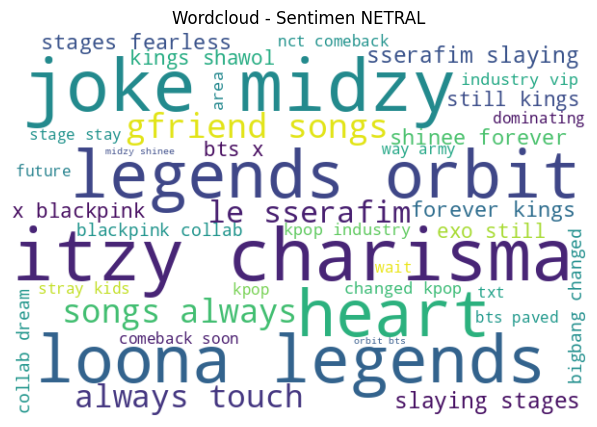

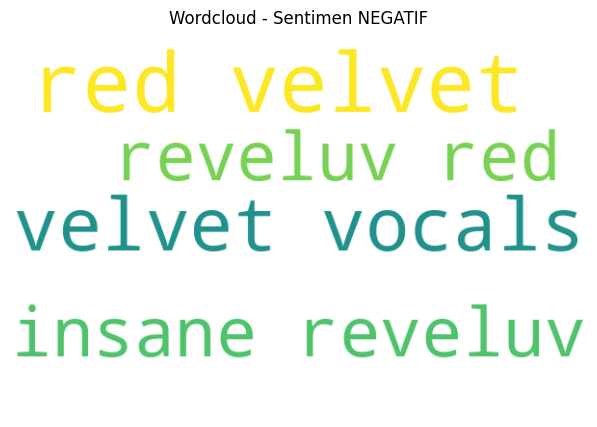

In [ ]:
from wordcloud import WordCloud

for label in ["positif","netral","negatif"]:
    text = " ".join(df[df['sentiment_label']==label]['cleaned'].astype(str))
    wc = WordCloud(width=600, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Wordcloud - Sentimen {label.upper()}")
    plt.show()


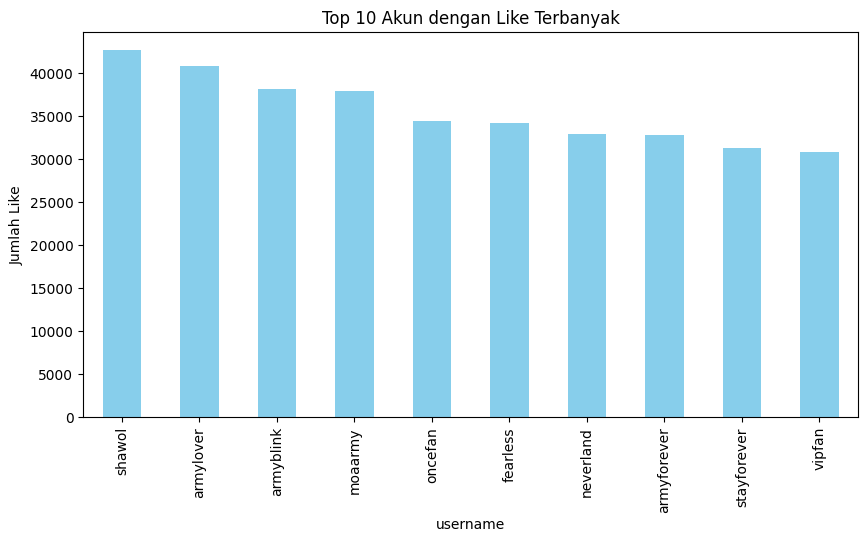

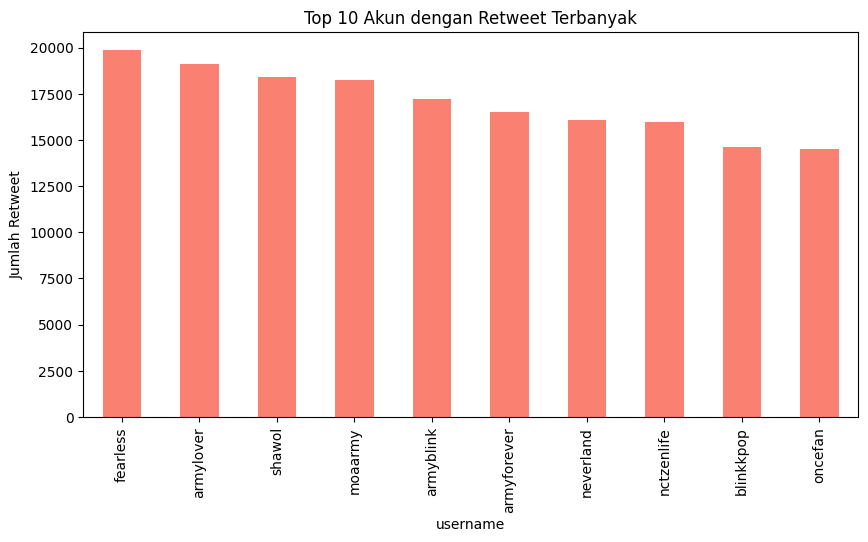

In [ ]:
top_like = df.groupby("username")["like_count"].sum().sort_values(ascending=False).head(10)
top_rt = df.groupby("username")["retweet_count"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_like.plot(kind="bar", color="skyblue")
plt.title("Top 10 Akun dengan Like Terbanyak")
plt.ylabel("Jumlah Like")
plt.show()

plt.figure(figsize=(10,5))
top_rt.plot(kind="bar", color="salmon")
plt.title("Top 10 Akun dengan Retweet Terbanyak")
plt.ylabel("Jumlah Retweet")
plt.show()


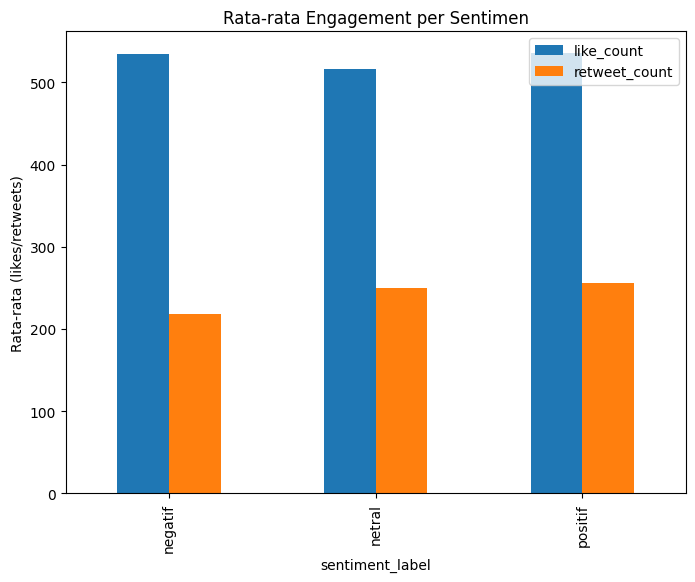

                 like_count  retweet_count
sentiment_label                           
negatif          534.500000     218.783333
netral           515.590331     249.666667
positif          535.073446     256.449153


In [ ]:
engagement = df.groupby("sentiment_label")[["like_count","retweet_count"]].mean()

engagement.plot(kind="bar", figsize=(8,6))
plt.title("Rata-rata Engagement per Sentimen")
plt.ylabel("Rata-rata (likes/retweets)")
plt.show()

print(engagement)
